<a href="https://colab.research.google.com/github/Rakesshreghu/datascience/blob/main/level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
base_url = "http://quotes.toscrape.com/page/{}/"
quotes = []
authors = []

for page in range(1, 6):  # scraping first 5 pages
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract quotes and authors
    for q in soup.find_all("span", class_="text"):
        quotes.append(q.text)
    for a in soup.find_all("small", class_="author"):
        authors.append(a.text)

# Create DataFrame
df = pd.DataFrame({"Quote": quotes, "Author": authors})
print(df.head())


                                               Quote           Author
0  “The world as we have created it is a process ...  Albert Einstein
1  “It is our choices, Harry, that show what we t...     J.K. Rowling
2  “There are only two ways to live your life. On...  Albert Einstein
3  “The person, be it gentleman or lady, who has ...      Jane Austen
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe


In [3]:
df.to_csv("quotes.csv", index=False)
print("Data saved to quotes.csv")


Data saved to quotes.csv


In [4]:
df = pd.read_csv("quotes.csv")
print("Before Cleaning:\n", df.head())


Before Cleaning:
                                                Quote           Author
0  “The world as we have created it is a process ...  Albert Einstein
1  “It is our choices, Harry, that show what we t...     J.K. Rowling
2  “There are only two ways to live your life. On...  Albert Einstein
3  “The person, be it gentleman or lady, who has ...      Jane Austen
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe


In [7]:

print("Missing values:\n", df.isnull().sum())
df.fillna("Unknown", inplace=True)


Missing values:
 Quote     0
Author    0
dtype: int64


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Author_encoded"] = le.fit_transform(df["Author"])

print(df.head())


                                               Quote           Author  \
0  “The world as we have created it is a process ...  Albert Einstein   
1  “It is our choices, Harry, that show what we t...     J.K. Rowling   
2  “There are only two ways to live your life. On...  Albert Einstein   
3  “The person, be it gentleman or lady, who has ...      Jane Austen   
4  “Imperfection is beauty, madness is genius and...   Marilyn Monroe   

   Author_encoded  
0               0  
1              14  
2               0  
3              16  
4              19  


In [9]:
df.to_csv("quotes_cleaned.csv", index=False)
print("Data saved to quotes_cleaned.csv")


Data saved to quotes_cleaned.csv


In [10]:
print("Summary:\n", df.describe(include="all"))


Summary:
                                                     Quote           Author  \
count                                                  50               50   
unique                                                 50               28   
top     “The world as we have created it is a process ...  Albert Einstein   
freq                                                    1                8   
mean                                                  NaN              NaN   
std                                                   NaN              NaN   
min                                                   NaN              NaN   
25%                                                   NaN              NaN   
50%                                                   NaN              NaN   
75%                                                   NaN              NaN   
max                                                   NaN              NaN   

        Author_encoded  
count         50.00000  
uni

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
print("Summary:\n", df.describe(include="all"))


Summary:
                                                     Quote           Author  \
count                                                  50               50   
unique                                                 50               28   
top     “The world as we have created it is a process ...  Albert Einstein   
freq                                                    1                8   
mean                                                  NaN              NaN   
std                                                   NaN              NaN   
min                                                   NaN              NaN   
25%                                                   NaN              NaN   
50%                                                   NaN              NaN   
75%                                                   NaN              NaN   
max                                                   NaN              NaN   

        Author_encoded  
count         50.00000  
uni

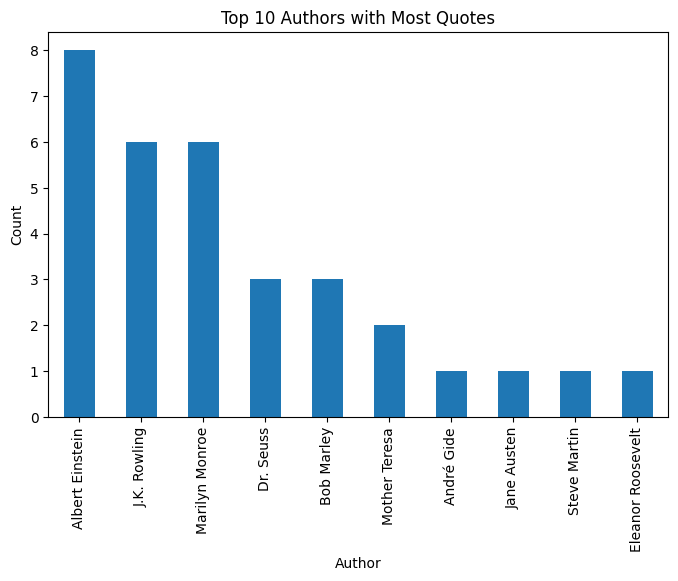

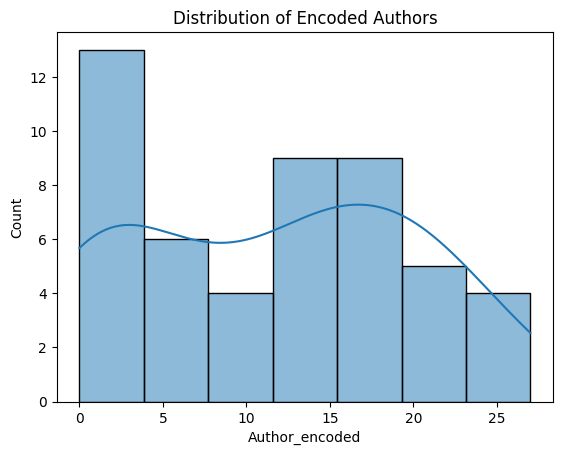

In [13]:
# Top Authors
plt.figure(figsize=(8,5))
df["Author"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Authors with Most Quotes")
plt.ylabel("Count")
plt.show()

# Distribution of encoded authors
sns.histplot(df["Author_encoded"], kde=True)
plt.title("Distribution of Encoded Authors")
plt.show()
